In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from scipy import stats
import matplotlib.dates as mdates
import os
import glob
import re
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [2]:
#Constant variables
month = {
                'Jan' : '01',
                'Feb' : '02',
                'Mar' : '03',
                'May' : '04',
                'Apr' : '05',
                'Jun' : '06',
                'Jul' : '07',
                'Aug' : '08',
                'Sep' : '09',
                'Oct' : '10',
                'Nov' : '11',
                'Dec' : '12',  
}

# Use 2016-2019 Data to predict 2020's Gold Price

## import dataset

In [3]:
gold =pd.read_csv("./dataset/gld_price_data.csv")
gas =pd.read_csv("./dataset/natural_gas_data.csv")
oil = pd.read_csv('./dataset/crude_oil_eu_data.csv')
dolla = pd.read_csv('./dataset/dolla_index_data.csv')
etf = pd.read_csv('./dataset/etf_data.csv')
sil = pd.DataFrame(pd.read_csv('./dataset/silver_price_data.csv'), columns={'Date','USD'})
bit = pd.DataFrame(pd.read_csv('./dataset/bit_data.csv'), columns={'Date','Close'})

In [4]:
sil = sil[['Date','USD']]
bit = bit[['Date','Close']]

## data preprocessing

In [5]:
### daily data only
### df : list of dataframe , name : list of dataframe's value's name , color : list of data's color
df = [gold,gas,oil,dolla,etf,sil,bit]
columnName = ['gld_price', 'gas_price', 'oil_price','dolla_index','etf_index','silver_price','bitcoin_price']
color = ['red', 'green', 'blue', 'violet','purple','silver','gold']

In [6]:
### rename all data columns
for i in range(len(df)):
    df[i] = df[i].rename(columns={df[i].columns[0]:'date',df[i].columns[1]:columnName[i]})

In [7]:
### set date as index and join all data
data = df[0].set_index('date')
for i in range(len(df)):
    if i > 0:
        data = data.join(df[i].set_index('date'))

In [8]:
data

,gld_price,gas_price,oil_price,dolla_index,etf_index,silver_price,bitcoin_price
date,,,,,,,
2016-02-19,1231.15,1.83,31.66,113.9502,24.88,15.37,420.785004
2016-02-19,1267.00,1.83,31.66,113.9502,24.88,15.37,420.785004
2016-02-22,1211.00,1.86,33.59,113.8157,23.31,15.00,437.747986
2016-02-23,1221.35,1.85,31.90,114.1686,23.69,15.21,420.735992
2016-02-24,1250.75,1.85,31.50,114.163,24.24,15.32,424.954987
2016-02-25,1236.00,1.78,32.83,113.916,23.36,15.16,424.544006
2016-02-26,1226.50,1.78,35.76,114.365,21.67,15.17,432.152008
2016-02-29,1234.90,1.62,35.92,114.2359,22.59,14.75,437.696991
2016-03-01,1236.50,1.57,35.73,113.9208,21.97,14.99,435.122986


In [9]:
data = data.replace('.', np.NaN)

In [10]:
data = data.dropna()

In [11]:
### convert index to datetime64
data = pd.DataFrame(data, index = np.array([np.datetime64(i) for i in data.index]))

In [12]:
### convert all data values to float
for i in data.columns:
    data[i] = data[i].astype(str).astype(float)

In [13]:
data.head(5)

,gld_price,gas_price,oil_price,dolla_index,etf_index,silver_price,bitcoin_price
2016-02-19,1231.15,1.83,31.66,113.9502,24.88,15.37,420.785004
2016-02-19,1267.00,1.83,31.66,113.9502,24.88,15.37,420.785004
2016-02-22,1211.00,1.86,33.59,113.8157,23.31,15.00,437.747986
2016-02-23,1221.35,1.85,31.90,114.1686,23.69,15.21,420.735992
2016-02-24,1250.75,1.85,31.50,114.1630,24.24,15.32,424.954987


## DATA EXPLORATION

In [14]:
#normalization and plot function
def plot_df(data,columns):
    plt_data = data.copy()
    min_max_scaler = preprocessing.MinMaxScaler()
    for i in data.columns:
        scale = min_max_scaler.fit_transform(plt_data[i].values.reshape(-1,1))
        temp = pd.DataFrame(scale, columns=[i], index = data.index)
        plt_data[i] = temp
    ax = plt.gca()
    plt_data.plot(kind='line', y='gld_price',ax=ax,color='blue',figsize=(10,5))
    plt_data.plot(kind='line', y=columns,ax=ax,color='red')
    plt.show()

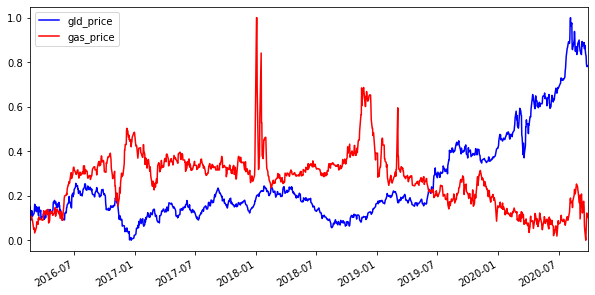

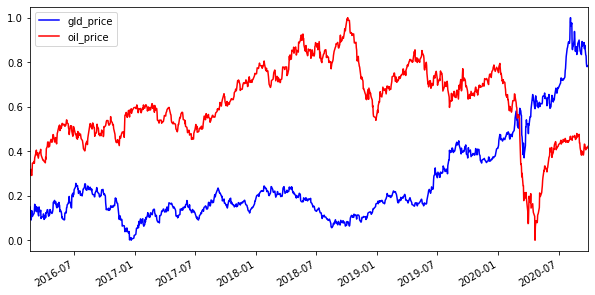

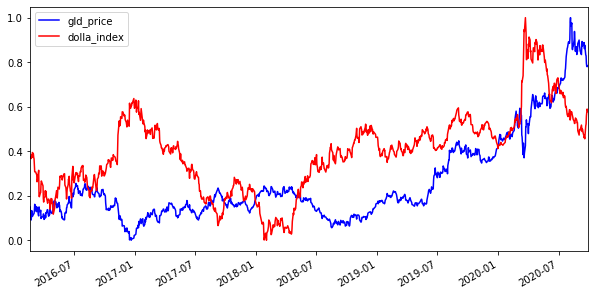

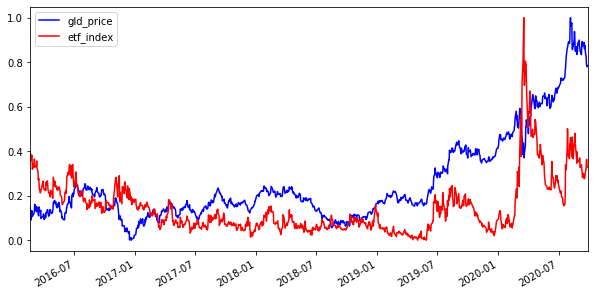

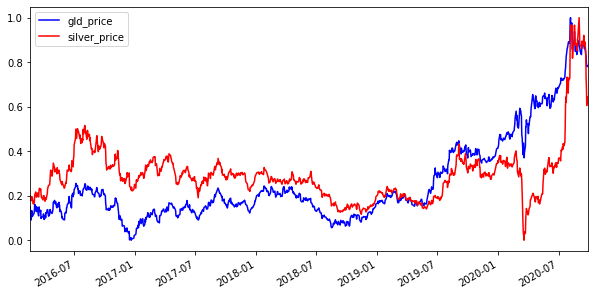

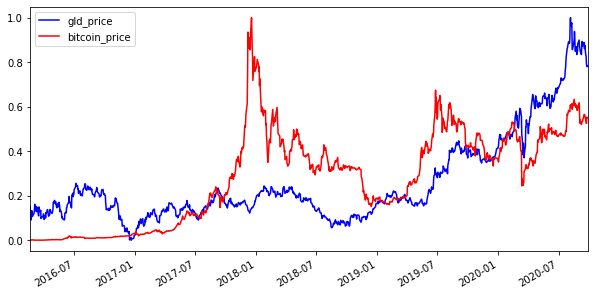

In [15]:
#plot all feature
for i in data.columns:
    if i != 'gld_price':
        plot_df(data,i)

In [16]:
# plt_list = [(data.columns[i],color[i]) for i in range(len(data.columns))]

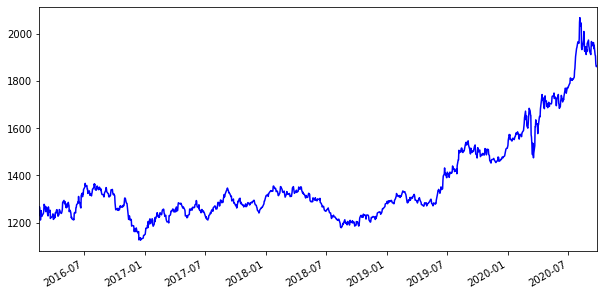

In [17]:
data['gld_price'].plot(kind='line',color='blue',figsize=(10,5))

## CORRELATION

In [18]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,gld_price,gas_price,oil_price,dolla_index,etf_index,silver_price,bitcoin_price
gld_price,1,-0.603398,-0.404386,0.519657,0.546552,0.62939,0.552404
gas_price,-0.603398,1,0.462715,-0.340142,-0.528896,-0.212775,-0.208069
oil_price,-0.404386,0.462715,1,-0.399845,-0.755387,-0.296659,0.308204
dolla_index,0.519657,-0.340142,-0.399845,1,0.502761,0.0280865,0.145941
etf_index,0.546552,-0.528896,-0.755387,0.502761,1,0.289064,-0.0072683
silver_price,0.62939,-0.212775,-0.296659,0.0280865,0.289064,1,0.133953
bitcoin_price,0.552404,-0.208069,0.308204,0.145941,-0.0072683,0.133953,1


In [19]:
## drop unusable  feature
data = data.drop(columns=[data.columns[i] for i in []])

## GRANGER CAUSATION TEST

In [20]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import coint_johansen
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [21]:
granger = grangers_causation_matrix(data, variables = data.columns)

In [22]:
granger

,gld_price_x,gas_price_x,oil_price_x,dolla_index_x,etf_index_x,silver_price_x,bitcoin_price_x
gld_price_y,1.0000,0.3144,0.1583,0.0047,0.0000,0.0000,0.2805
gas_price_y,0.0001,1.0000,0.0116,0.1415,0.0056,0.2522,0.0000
oil_price_y,0.0333,0.3102,1.0000,0.0243,0.0000,0.3414,0.0103
dolla_index_y,0.0033,0.0423,0.0750,1.0000,0.0000,0.0007,0.1126
etf_index_y,0.0000,0.0075,0.0000,0.0008,1.0000,0.0010,0.0000
silver_price_y,0.0000,0.1795,0.0485,0.0000,0.0030,1.0000,0.2175
bitcoin_price_y,0.0009,0.0481,0.5996,0.1245,0.0560,0.3455,1.0000


In [23]:
## drop unusable  feature
data = data.drop(columns=[data.columns[i] for i in [1,2,6]])

In [24]:
data

,gld_price,dolla_index,etf_index,silver_price
2016-02-19,1231.15,113.9502,24.88,15.370
2016-02-19,1267.00,113.9502,24.88,15.370
2016-02-22,1211.00,113.8157,23.31,15.000
2016-02-23,1221.35,114.1686,23.69,15.210
2016-02-24,1250.75,114.1630,24.24,15.320
2016-02-25,1236.00,113.9160,23.36,15.160
2016-02-26,1226.50,114.3650,21.67,15.170
2016-02-29,1234.90,114.2359,22.59,14.750
2016-03-01,1236.50,113.9208,21.97,14.990
2016-03-02,1239.20,113.7902,22.00,14.820


## COINTEGRATION TEST

In [25]:
cointegration_test(data)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
gld_price ::  44.18     > 40.1749   =>   True
dolla_index ::  18.21     > 24.2761   =>   False
etf_index ::  2.87      > 12.3212   =>   False
silver_price ::  1.02      > 4.1296    =>   False


In [26]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [27]:
for name, column in data.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "gld_price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.4573
 No. Lags Chosen       = 4
 Critical value 1%     = -3.436
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.9835. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "dolla_index" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.736
 No. Lags Chosen       = 1
 Critical value 1%     = -3.436
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.4127. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "etf_index" 
    -----------------------------------------------
 Null Hypothesis: D

In [28]:
## 1st Diff
df_diff = data.diff().dropna()

In [29]:
for name, column in df_diff.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "gld_price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -18.2644
 No. Lags Chosen       = 3
 Critical value 1%     = -3.436
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "dolla_index" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -31.2244
 No. Lags Chosen       = 0
 Critical value 1%     = -3.436
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "etf_index" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significan

In [30]:
#  #2nd diff
#  df_differenced = df_differenced.diff().dropna()
#  for name, column in df_differenced.iteritems():
#      adfuller_test(column, name=column.name)
#      print('\n')

In [31]:
year = {str(i):0 for i in range(2015,2021)}
for i in data.index:
    for key in year:
        if key in str(i):
            year[key] += 1

In [32]:
year

{'2015': 0, '2016': 214, '2017': 244, '2018': 239, '2019': 242, '2020': 182}

In [33]:
x = df_diff[:-year['2020']]
y = df_diff[-year['2020']:]

In [34]:
print(len(x))

938


In [35]:
print(len(y))

182


# Create VAR model

In [36]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [37]:
count = 0
nobs = 7
n = len(x)
pred = pd.DataFrame()
for i in range(n+1,len(df_diff)-7,7):
    df_x = df_diff[i-n-1:i-1]
    df_y = df_diff[i:i+7]['gld_price']
    model = VAR(df_x)
    aic = {'n': 1, 'value':model.fit(1).aic}
    for j in range(5,15):
        result = model.fit(j)
        if result.aic < aic['value']:
            aic['n'] = j
            aic['value'] = result.aic
    print(aic)
    model_fitted = model.fit(aic['n'])
    lag_order = model_fitted.k_ar
    forecast_input = df_diff.values[-lag_order:]
    fc = model_fitted.forecast(y=forecast_input, steps=nobs)
    df_forecast = pd.DataFrame(fc, index=df_y.index[-nobs:], columns=df_diff.columns + '_1d')
    df_results = invert_transformation(data[i-n-1:i-1], df_forecast, second_diff=False)  
    pred = pred.append(df_results.loc[:, ['gld_price_forecast']])

C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


{'n': 6, 'value': -2.0151896821289452}


C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ig

{'n': 12, 'value': -2.035315096085151}
{'n': 6, 'value': -2.1020904356279653}
{'n': 6, 'value': -2.1071369809016463}
{'n': 6, 'value': -2.1311648766972264}
{'n': 8, 'value': -2.1310871189934546}
{'n': 8, 'value': -2.0521447890857827}
{'n': 6, 'value': -1.7169630355340346}
{'n': 6, 'value': -1.2015834731087818}
{'n': 12, 'value': -1.0631788182200215}


C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ig

{'n': 14, 'value': -0.9739042521534009}
{'n': 14, 'value': -1.0077573831075308}
{'n': 13, 'value': -1.013902502193398}
{'n': 14, 'value': -1.005296601537816}


C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ig

{'n': 14, 'value': -0.9476303427999402}
{'n': 14, 'value': -0.919642791011968}
{'n': 14, 'value': -0.8911800621504593}
{'n': 6, 'value': -0.8809244116774647}
{'n': 14, 'value': -0.8726804361099609}

C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ig


{'n': 6, 'value': -0.9063410482797328}
{'n': 6, 'value': -0.6170756958170797}
{'n': 6, 'value': -0.43126857433263754}
{'n': 14, 'value': -0.22518499752042048}


C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ig

{'n': 6, 'value': -0.11176588017818057}
{'n': 14, 'value': -0.14483977749532823}


In [38]:
test_data = pd.DataFrame(data[-year['2020']:]['gld_price'])

In [39]:
pred

,gld_price_forecast
2020-01-03,1515.867265
2020-01-06,1513.775321
2020-01-07,1519.300932
2020-01-08,1517.953351
2020-01-09,1518.784830
2020-01-10,1519.889053
2020-01-13,1519.519861
2020-01-14,1549.957215
2020-01-15,1549.105524
2020-01-16,1559.346460


In [40]:
# pred

In [41]:
# test_data

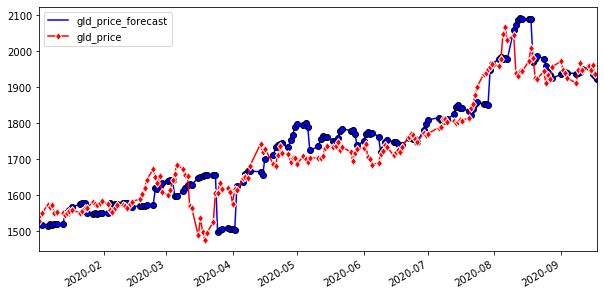

In [42]:
ax = plt.gca()
pred.plot(kind='line', y='gld_price_forecast',ax=ax,color='blue',figsize=(10,5),marker='o',markeredgecolor="black")
test_data[:-7].plot(kind='line', y='gld_price',ax=ax,color='red',marker='d',markeredgecolor="white")
plt.show()

## Evaluate Model

In [43]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: gld_price')
accuracy_prod = forecast_accuracy(pred['gld_price_forecast'].values, test_data[0:175]['gld_price'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Forecast Accuracy of: gld_price
mape :  0.0244
me :  12.4452
mae :  41.3392
mpe :  0.0073
rmse :  57.0275
corr :  0.9338
minmax :  0.0236


In [44]:
test_data[-20:-13]

,gld_price
2020-08-28,1957.35
2020-09-01,1972.35
2020-09-02,1947.05
2020-09-03,1940.45
2020-09-04,1926.30
2020-09-08,1910.95
2020-09-09,1947.20


<function matplotlib.pyplot.show(*args, **kw)>

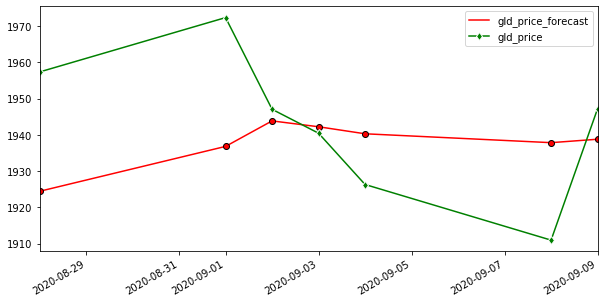

In [45]:
ax = plt.gca()
pred[-14:-7].plot(kind='line', y='gld_price_forecast',ax=ax,color='red',figsize=(10,5),marker='o',markeredgecolor="black")
test_data[-20:-13].plot(kind='line', y='gld_price',ax=ax,color='blue',marker='d',markeredgecolor="white")
plt.show

In [46]:
pred[-14:]

,gld_price_forecast
2020-08-28,1924.424677
2020-09-01,1936.809341
2020-09-02,1943.849046
2020-09-03,1942.228559
2020-09-04,1940.292763
2020-09-08,1937.842358
2020-09-09,1938.791572
2020-09-10,1942.413784
2020-09-11,1951.437568
2020-09-14,1957.267808


In [47]:
test_data[-20:-13]

,gld_price
2020-08-28,1957.35
2020-09-01,1972.35
2020-09-02,1947.05
2020-09-03,1940.45
2020-09-04,1926.30
2020-09-08,1910.95
2020-09-09,1947.20


 # Use 01/03/2016-01/03/2021 Data to Predict 02/03/2021-08/03/2021

In [48]:
def format_date(date):
    if re.search('\w+ \d\d, \d\d\d\d',date):
        x = date.split(' ')
        x[0] = month[x[0]]
        x[1] = x[1][0] + x[1][1]
        date = x[2]+'-'+x[0]+'-'+x[1]
    return date

In [49]:
df2 = []
path = './new dataset/'
os.chdir(path)
for file in glob.glob("*.csv"):
    df2.append(pd.read_csv(file))
    print(file)
os.chdir('../')

Crude Oil Prices Brent - Europe (1_3_2016-8_3_2021).csv
ETFS Physical Gold Futures Historical Data (1_3_2016 - 8_3_2021).csv
GOLDAMGBD228NLBM (1_3_2016 - 8_3_2021).csv
Henry Hub Natural Gas Spot Price (7_1_1997 - 8_3_2021).csv
Silver Futures Historical Data (1_3_2016 - 8_3_2021).csv
United States 10-Year Bond Yield Historical Data (1_3_2016 - 8_3_2021).csv
US Dollar Index Historical Data (1_3_2016 - 8_3_2021).csv


In [50]:
### rename all data columns
data = []
columnName = ['Crude_Oil', 'Gold_ETFS','gld_price', 'Natural_Gas','Silver','Bond_Yield','USDollar_Index']
for i in range(len(df2)):
    data.append(pd.DataFrame(df2[i], columns={df2[i].columns[0],df2[i].columns[1]}))

In [51]:
data

[            DATE DCOILBRENTEU
 0     2016-03-01        35.73
 1     2016-03-02        36.38
 2     2016-03-03        35.75
 3     2016-03-04        37.61
 4     2016-03-07        39.02
 5     2016-03-08        39.16
 6     2016-03-09        40.26
 7     2016-03-10        38.63
 8     2016-03-11        39.41
 9     2016-03-14        38.06
 10    2016-03-15        37.49
 11    2016-03-16        38.38
 12    2016-03-17        39.29
 13    2016-03-18        39.26
 14    2016-03-21        39.91
 15    2016-03-22        40.54
 16    2016-03-23        38.84
 17    2016-03-24        38.33
 18    2016-03-25            .
 19    2016-03-28        38.33
 20    2016-03-29        36.75
 21    2016-03-30        36.75
 22    2016-03-31        36.75
 23    2016-04-01        36.42
 24    2016-04-04        36.05
 25    2016-04-05        35.88
 26    2016-04-06        37.77
 27    2016-04-07        37.15
 28    2016-04-08        40.71
 29    2016-04-11        41.58
 ...          ...          ...
 1280  2

In [52]:
data[0] = data[0][['DATE','DCOILBRENTEU']]
data[1] = data[1][['Date','Price']]
data[2] = data[2][['DATE','GOLDAMGBD228NLBM']]
data[3] = data[3][['Day','Henry Hub Natural Gas Spot Price Dollars per Million Btu']]
data[4] = data[4][['Date','Price']]
data[5] = data[5][['Date','Price']]
data[6] = data[6][['Date','Price']]

In [53]:
data

[            DATE DCOILBRENTEU
 0     2016-03-01        35.73
 1     2016-03-02        36.38
 2     2016-03-03        35.75
 3     2016-03-04        37.61
 4     2016-03-07        39.02
 5     2016-03-08        39.16
 6     2016-03-09        40.26
 7     2016-03-10        38.63
 8     2016-03-11        39.41
 9     2016-03-14        38.06
 10    2016-03-15        37.49
 11    2016-03-16        38.38
 12    2016-03-17        39.29
 13    2016-03-18        39.26
 14    2016-03-21        39.91
 15    2016-03-22        40.54
 16    2016-03-23        38.84
 17    2016-03-24        38.33
 18    2016-03-25            .
 19    2016-03-28        38.33
 20    2016-03-29        36.75
 21    2016-03-30        36.75
 22    2016-03-31        36.75
 23    2016-04-01        36.42
 24    2016-04-04        36.05
 25    2016-04-05        35.88
 26    2016-04-06        37.77
 27    2016-04-07        37.15
 28    2016-04-08        40.71
 29    2016-04-11        41.58
 ...          ...          ...
 1280  2

In [54]:
for i in range(len(df2)):
    data[i] = data[i].rename(columns={data[i].columns[0]:'date',data[i].columns[1]:columnName[i]})

In [55]:
len(df2)

7

In [56]:
data

[            date Crude_Oil
 0     2016-03-01     35.73
 1     2016-03-02     36.38
 2     2016-03-03     35.75
 3     2016-03-04     37.61
 4     2016-03-07     39.02
 5     2016-03-08     39.16
 6     2016-03-09     40.26
 7     2016-03-10     38.63
 8     2016-03-11     39.41
 9     2016-03-14     38.06
 10    2016-03-15     37.49
 11    2016-03-16     38.38
 12    2016-03-17     39.29
 13    2016-03-18     39.26
 14    2016-03-21     39.91
 15    2016-03-22     40.54
 16    2016-03-23     38.84
 17    2016-03-24     38.33
 18    2016-03-25         .
 19    2016-03-28     38.33
 20    2016-03-29     36.75
 21    2016-03-30     36.75
 22    2016-03-31     36.75
 23    2016-04-01     36.42
 24    2016-04-04     36.05
 25    2016-04-05     35.88
 26    2016-04-06     37.77
 27    2016-04-07     37.15
 28    2016-04-08     40.71
 29    2016-04-11     41.58
 ...          ...       ...
 1280  2021-01-26     55.26
 1281  2021-01-27     55.07
 1282  2021-01-28     54.87
 1283  2021-01-29   

In [57]:
for i in data:
    print(i.date[0])

2016-03-01
Mar 08, 2021
2016-03-01
1997-01-07
Mar 08, 2021
Mar 08, 2021
Mar 08, 2021


In [58]:
for i in [1,4,5,6]:
    d = []
    for j in data[i]['date']:
        d.append(format_date(j))
    d = pd.Series(d)
    data[i]['date'] = d

In [59]:
data

[            date Crude_Oil
 0     2016-03-01     35.73
 1     2016-03-02     36.38
 2     2016-03-03     35.75
 3     2016-03-04     37.61
 4     2016-03-07     39.02
 5     2016-03-08     39.16
 6     2016-03-09     40.26
 7     2016-03-10     38.63
 8     2016-03-11     39.41
 9     2016-03-14     38.06
 10    2016-03-15     37.49
 11    2016-03-16     38.38
 12    2016-03-17     39.29
 13    2016-03-18     39.26
 14    2016-03-21     39.91
 15    2016-03-22     40.54
 16    2016-03-23     38.84
 17    2016-03-24     38.33
 18    2016-03-25         .
 19    2016-03-28     38.33
 20    2016-03-29     36.75
 21    2016-03-30     36.75
 22    2016-03-31     36.75
 23    2016-04-01     36.42
 24    2016-04-04     36.05
 25    2016-04-05     35.88
 26    2016-04-06     37.77
 27    2016-04-07     37.15
 28    2016-04-08     40.71
 29    2016-04-11     41.58
 ...          ...       ...
 1280  2021-01-26     55.26
 1281  2021-01-27     55.07
 1282  2021-01-28     54.87
 1283  2021-01-29   

In [60]:
tmp = data[2].set_index('date')
for i in range(len(data)):
    if i != 2:
        tmp = tmp.join(data[i].set_index('date'))
data = tmp.copy()

In [61]:
data

,gld_price,Crude_Oil,Gold_ETFS,Natural_Gas,Silver,Bond_Yield,USDollar_Index
date,,,,,,,
2016-03-01,1240.000,35.73,119.09,1.57,15.562,1.827,98.35
2016-03-02,1229.350,36.38,119.61,1.60,15.850,1.835,98.21
2016-03-03,1241.950,35.75,121.58,1.59,15.976,1.835,97.59
2016-03-04,1271.500,37.61,123.02,1.49,16.536,1.876,97.34
2016-03-07,1267.600,39.02,122.43,1.56,16.484,1.904,97.07
2016-03-08,1274.100,39.16,122.52,1.60,16.225,1.831,97.21
2016-03-09,1258.250,40.26,121.33,1.61,16.206,1.879,97.17
2016-03-10,1247.250,38.63,122.25,1.72,16.398,1.936,96.07
2016-03-11,1262.250,39.41,121.79,1.74,16.465,1.980,96.17


In [62]:
data = data.replace('.', np.NaN)

In [63]:
data = data.dropna()

In [64]:
### convert index to datetime64
data = pd.DataFrame(data, index = np.array([np.datetime64(i) for i in data.index]))

In [65]:
### convert all data values to float
for i in data.columns:
    data[i] = data[i].astype(str).astype(float)

In [66]:
### convert index to datetime64
data = pd.DataFrame(data, index = np.array([np.datetime64(i) for i in data.index]))

In [67]:
### convert all data values to float
for i in data.columns:
    data[i] = data[i].astype(str).astype(float)

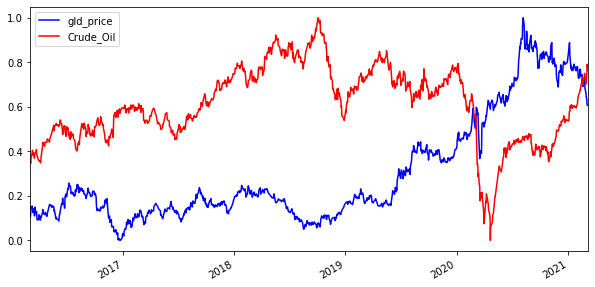

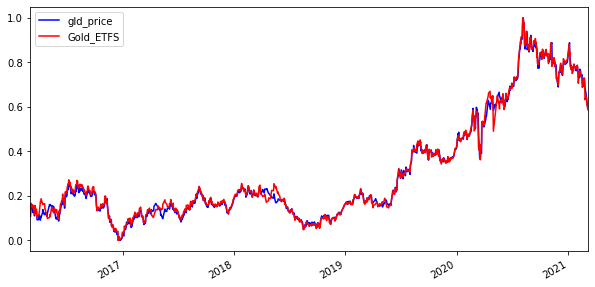

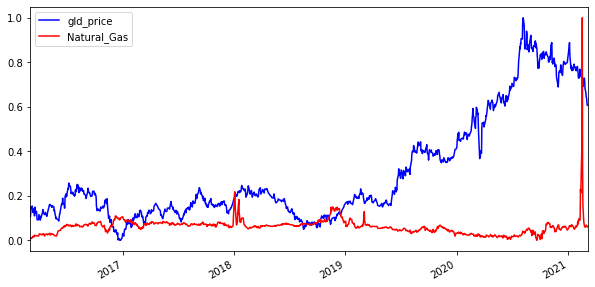

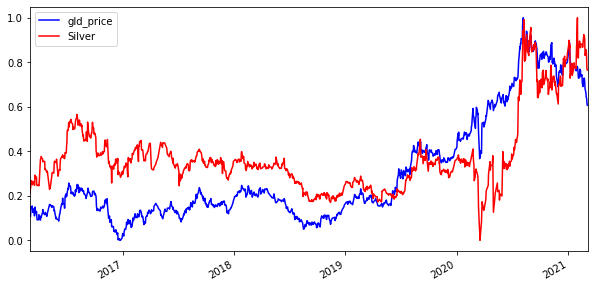

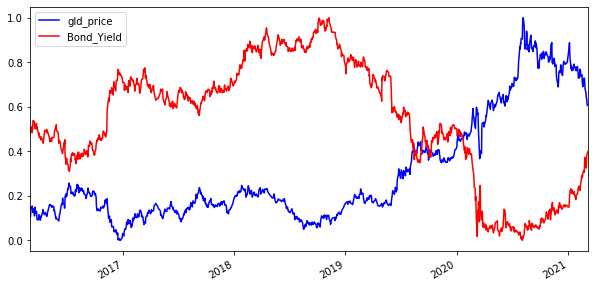

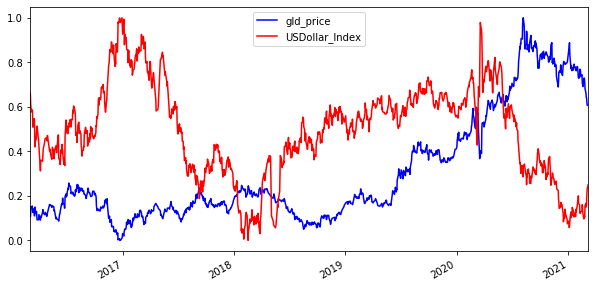

In [68]:
#plot all feature
for i in data.columns:
    if i != 'gld_price':
        plot_df(data,i)

## Correlation

In [69]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,gld_price,Crude_Oil,Gold_ETFS,Natural_Gas,Silver,Bond_Yield,USDollar_Index
gld_price,1,-0.405051,0.997894,-0.242613,0.732987,-0.845392,-0.290043
Crude_Oil,-0.405051,1,-0.418754,0.296665,-0.326718,0.732384,-0.206585
Gold_ETFS,0.997894,-0.418754,1,-0.247791,0.741691,-0.853435,-0.291998
Natural_Gas,-0.242613,0.296665,-0.247791,1,0.0336546,0.349666,-0.110638
Silver,0.732987,-0.326718,0.741691,0.0336546,1,-0.626066,-0.436019
Bond_Yield,-0.845392,0.732384,-0.853435,0.349666,-0.626066,1,0.0317041
USDollar_Index,-0.290043,-0.206585,-0.291998,-0.110638,-0.436019,0.0317041,1


In [70]:
granger = grangers_causation_matrix(data, variables = data.columns)

In [71]:
granger

,gld_price_x,Crude_Oil_x,Gold_ETFS_x,Natural_Gas_x,Silver_x,Bond_Yield_x,USDollar_Index_x
gld_price_y,1.0000,0.0261,0.0000,0.0427,0.0000,0.0000,0.0000
Crude_Oil_y,0.0004,1.0000,0.0010,0.1432,0.0147,0.0047,0.0491
Gold_ETFS_y,0.0000,0.0007,1.0000,0.0101,0.0000,0.0000,0.0000
Natural_Gas_y,0.0029,0.0002,0.0023,1.0000,0.0000,0.0000,0.1235
Silver_y,0.0000,0.0054,0.0000,0.0323,1.0000,0.0002,0.0838
Bond_Yield_y,0.0002,0.0405,0.0005,0.0021,0.0011,1.0000,0.0031
USDollar_Index_y,0.0045,0.0142,0.1485,0.7286,0.3635,0.0493,1.0000


In [72]:
## drop unusable  feature
data = data.drop(columns=[data.columns[i] for i in [1,3,6]])

In [73]:
for name, column in data.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "gld_price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.642
 No. Lags Chosen       = 11
 Critical value 1%     = -3.436
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.8612. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Gold_ETFS" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.9945
 No. Lags Chosen       = 0
 Critical value 1%     = -3.436
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.7553. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Silver" 
    -----------------------------------------------
 Null Hypothesis: Data

In [74]:
## 1st Diff
df_diff = data.diff().dropna()

In [75]:
for name, column in df_diff.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "gld_price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.6971
 No. Lags Chosen       = 10
 Critical value 1%     = -3.436
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Gold_ETFS" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -17.0024
 No. Lags Chosen       = 4
 Critical value 1%     = -3.436
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Silver" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance L

In [76]:
year = {str(i):0 for i in range(2015,2021)}
for i in data.index:
    for key in year:
        if key in str(i):
            year[key] += 1

In [77]:
year

{'2015': 0, '2016': 194, '2017': 233, '2018': 227, '2019': 227, '2020': 227}

In [78]:
x = df_diff[df_diff.index<'2021-03-01']
y = df_diff[df_diff.index>='2021-03-01']

In [79]:
y

,gld_price,Gold_ETFS,Silver,Bond_Yield
2021-03-01,-18.15,1.26,0.238,0.019
2021-03-02,-18.45,-0.71,0.201,-0.028
2021-03-03,-1.45,-0.49,-0.492,0.086
2021-03-04,-17.00,-0.60,-0.926,0.073
2021-03-05,-14.00,-1.93,-0.174,0.020
2021-03-08,-1.60,-1.49,-0.018,0.026


In [80]:
count = 0
nobs = 6
n = len(x)
pred = pd.DataFrame()
df_x = x
df_y = y
model = VAR(df_x)
aic = {'n': 1, 'value':model.fit(1).aic}
for j in range(5,15):
    result = model.fit(j)
    if result.aic < aic['value']:
        aic['n'] = j
        aic['value'] = result.aic
print(aic)
model_fitted = model.fit(10)
lag_order = model_fitted.k_ar
forecast_input = df_diff.values[-lag_order:]
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df_y.index[-nobs:], columns=df_diff.columns + '_1d')
df_results = invert_transformation(data[-7:], df_forecast, second_diff=False)  
pred = pred.append(df_results.loc[:, ['gld_price_forecast']])

{'n': 14, 'value': -3.2253025581826886}


C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [81]:
pred

,gld_price_forecast
2021-03-01,1680.751653
2021-03-02,1683.342460
2021-03-03,1691.395678
2021-03-04,1695.641768
2021-03-05,1694.292150
2021-03-08,1692.489213


In [82]:
test_data = pd.DataFrame(data[-6:]['gld_price'])

In [83]:
test_data

,gld_price
2021-03-01,1746.95
2021-03-02,1728.50
2021-03-03,1727.05
2021-03-04,1710.05
2021-03-05,1696.05
2021-03-08,1694.45


<function matplotlib.pyplot.show(*args, **kw)>

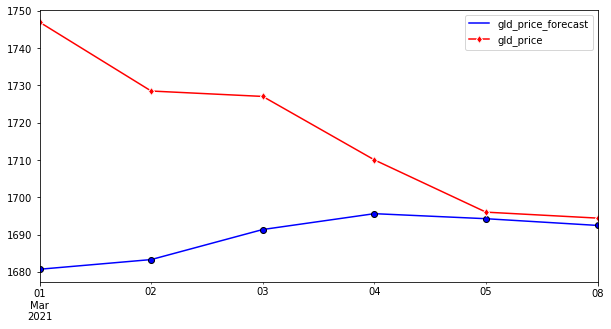

In [84]:
ax = plt.gca()
pred.plot(kind='line', y='gld_price_forecast',ax=ax,color='blue',figsize=(10,5),marker='o',markeredgecolor="black")
test_data.plot(kind='line', y='gld_price',ax=ax,color='red',marker='d',markeredgecolor="white")
plt.show

In [85]:
print('Forecast Accuracy of: gld_price')
accuracy_prod = forecast_accuracy(pred['gld_price_forecast'].values, test_data['gld_price'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Forecast Accuracy of: gld_price
mape :  0.0159
me :  -27.5228
mae :  27.5228
mpe :  -0.0159
rmse :  36.3024
corr :  -0.8306
minmax :  0.0159
